# Tooploox Data Science Intern - Cifar10 project

## PART II - CNN Visualisation 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import manifold
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE

# Importing custom functions for the project
from downloadANDload import *
from plot_functions import *

## Loading the features
The features have been extracted using a inception model V3 using the python script 'cifar-10_experiment.py'. We load the test data. For training we just take the first batch (we don't have to learn the features).

In [35]:
data_path = "/home/kyp/tooploox/MyProject/incepcion/"
X_train, y_train, X_test, y_test = load_CNN(data_path) 

Loading: test_batch.npz
Loading: data_batch_1.npz
Loading: data_batch_2.npz
Loading: data_batch_3.npz
Loading: data_batch_4.npz
Loading: data_batch_5.npz


In [3]:
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

(50000, 2048) (10000, 2048) (50000,) (10000,)


# Visualisation

In [36]:
random_state = 42
labels = load_class_names()
class_names = load_class_names()

Before running visualisations I will standardise data which is important for many algorithms (for example PCA). Also we will only us test batch of data to speed up the computation time (more would be also of little benefit).

In [37]:
X_sc = StandardScaler().fit_transform(X_test.astype(np.float))
y = y_test

Now I will run several visualisations with different methods (and different parameter settings).

### with PCA

Very quick computation, but possibly poor results.

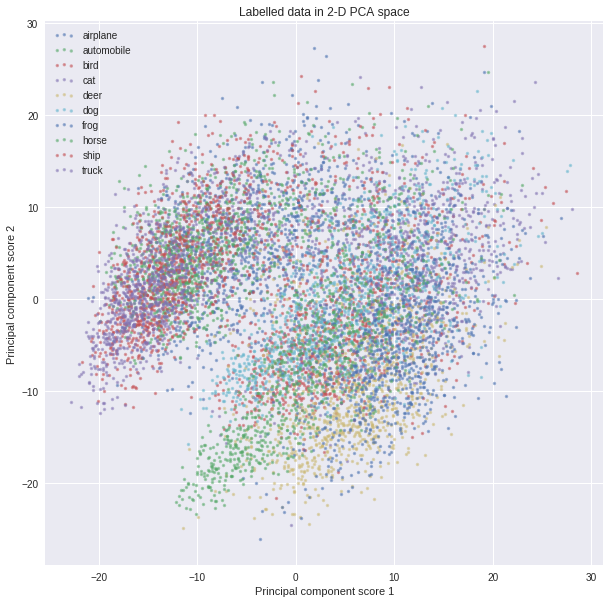

In [7]:
X_pca_2d = PCA(n_components=2).fit_transform(X_sc) 
plt.figure(figsize=(10,10))
scatter_2d_label(X_pca_2d, y, labels=labels)
plt.title('Labelled data in 2-D PCA space')
plt.xlabel('Principal component score 1')
plt.ylabel('Principal component score 2')
plt.legend(loc='best', scatterpoints=3)
plt.show()

### with TSNE

Strong visualisation algorithm, good results, but consistent with "no free lunch" theory - it takes time :) 

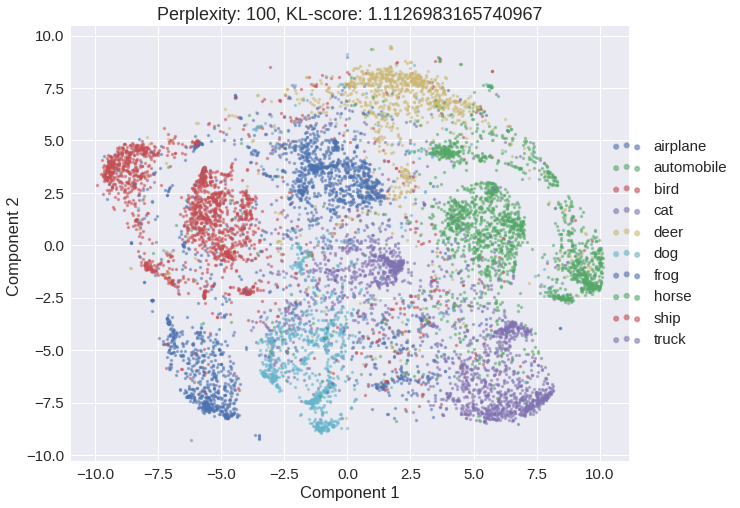

In [24]:
sns.set(font_scale=1.5)
tsne = TSNE(n_components=2, random_state=random_state) # default perplexity = 30
X_tsne_2d = tsne.fit_transform(X_sc)

plt.figure(figsize=(10,8))
scatter_2d_label(X_tsne_2d, y,labels=labels)
plt.title('Perplexity: {}, KL-score: {}'.format(30, tsne.kl_divergence_))
plt.xlabel('Component 1')
plt.ylabel('Component 2 ')
plt.legend(loc=7,bbox_to_anchor=[1.2, 0.5],markerscale=3,  scatterpoints=3)
plt.show()

Here, I will try different settings for perplexity parameter, which can improve visualisation.

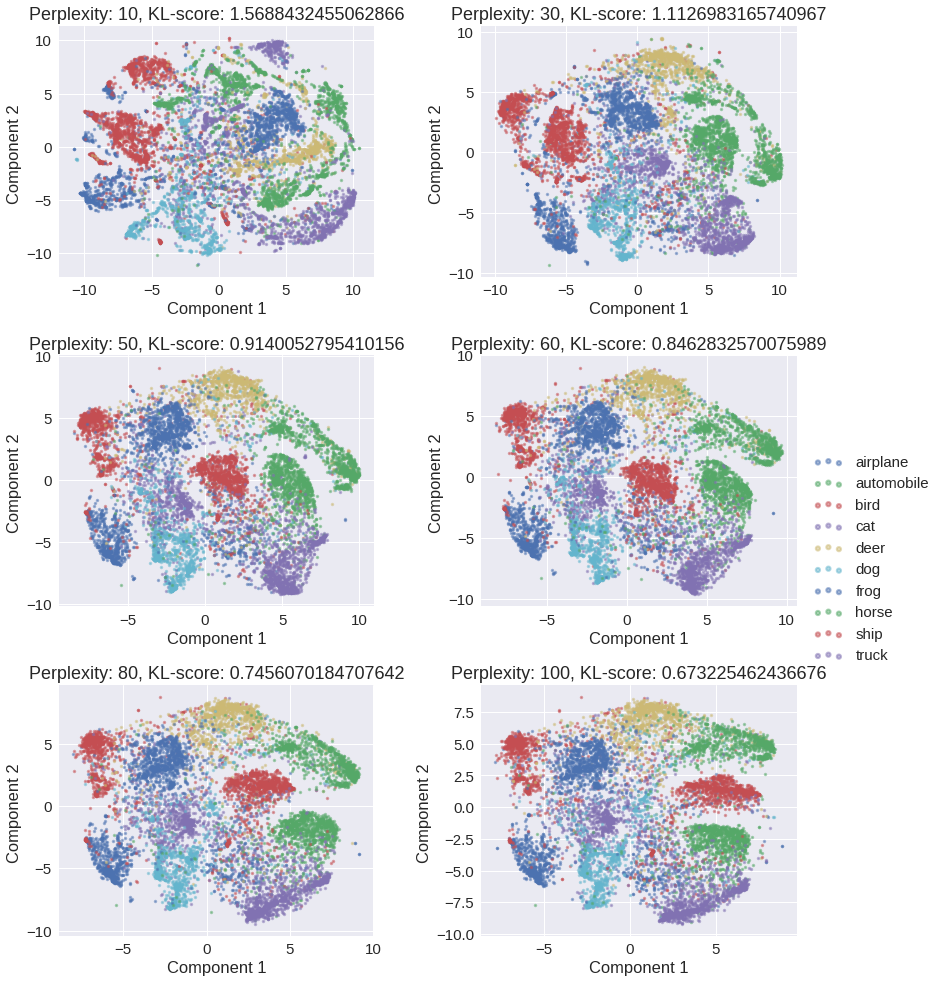

In [21]:
sns.set(font_scale=1.5) # Set default font size
fig, ax = plt.subplots(3,2,figsize=(12,14))
for ii, perplexity in enumerate([ 10, 30, 50, 60, 80, 100]):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
    X_tsne_2d = tsne.fit_transform(X_sc)
    plt.subplot(3,2,ii+1)
    scatter_2d_label(X_tsne_2d, y,labels=labels)
    plt.title('Perplexity: {}, KL-score: {}'.format(perplexity, tsne.kl_divergence_))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2 ')
plt.legend(loc='center left', bbox_to_anchor=[1.01, 1.5],markerscale=3, scatterpoints=3)
fig.tight_layout()
plt.show()

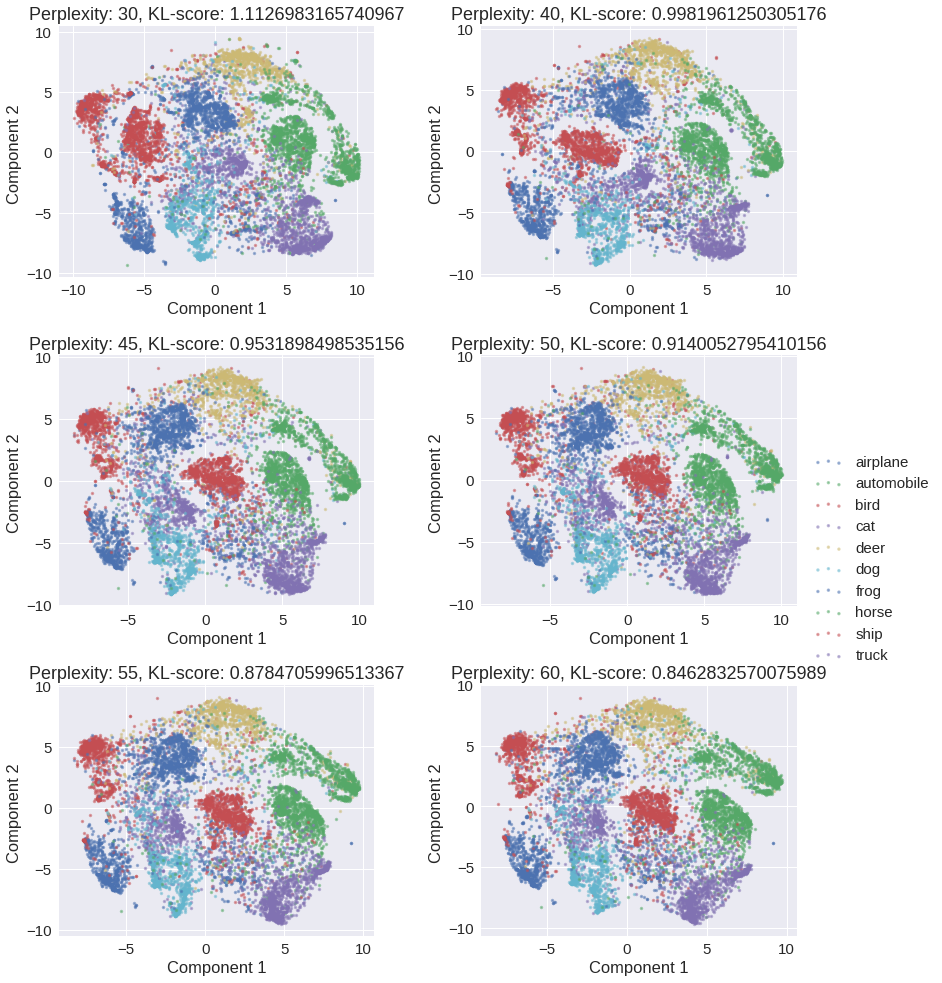

In [121]:
fig, ax = plt.subplots(3,2,figsize=(12,14))
for ii, perplexity in enumerate([ 30, 40, 45, 50, 55, 60]):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
    X_tsne_2d = tsne.fit_transform(X_sc)
    plt.subplot(3,2,ii+1)
    scatter_2d_label(X_tsne_2d, y,labels=labels)
    plt.title('Perplexity: {}, KL-score: {}'.format(perplexity, tsne.kl_divergence_))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2 ')
plt.legend(loc='center left', bbox_to_anchor=[1.01, 1.5],markerscale=3, scatterpoints=3)
fig.tight_layout()
plt.show()

Now We can show result from the best setting

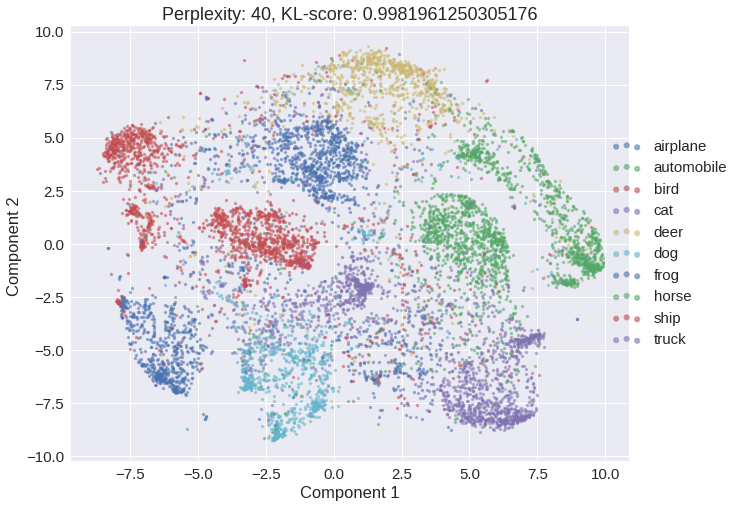

In [26]:
tsne = TSNE(n_components=2, perplexity=40, random_state=random_state)
X_tsne_2d = tsne.fit_transform(X_sc)

plt.figure(figsize=(10,8))
scatter_2d_label(X_tsne_2d, y,labels=labels)
plt.title('Perplexity: {}, KL-score: {}'.format(40, tsne.kl_divergence_))
plt.xlabel('Component 1')
plt.ylabel('Component 2 ')
plt.legend(loc=7,bbox_to_anchor=[1.2, 0.5],markerscale=3,  scatterpoints=3)
plt.show()

# Isomap

This is another visualisation method I will try. It also takes long to compute.

In [20]:
N = 10000
X_sc_sml = X_sc[:N]
y_sml = y[:N]

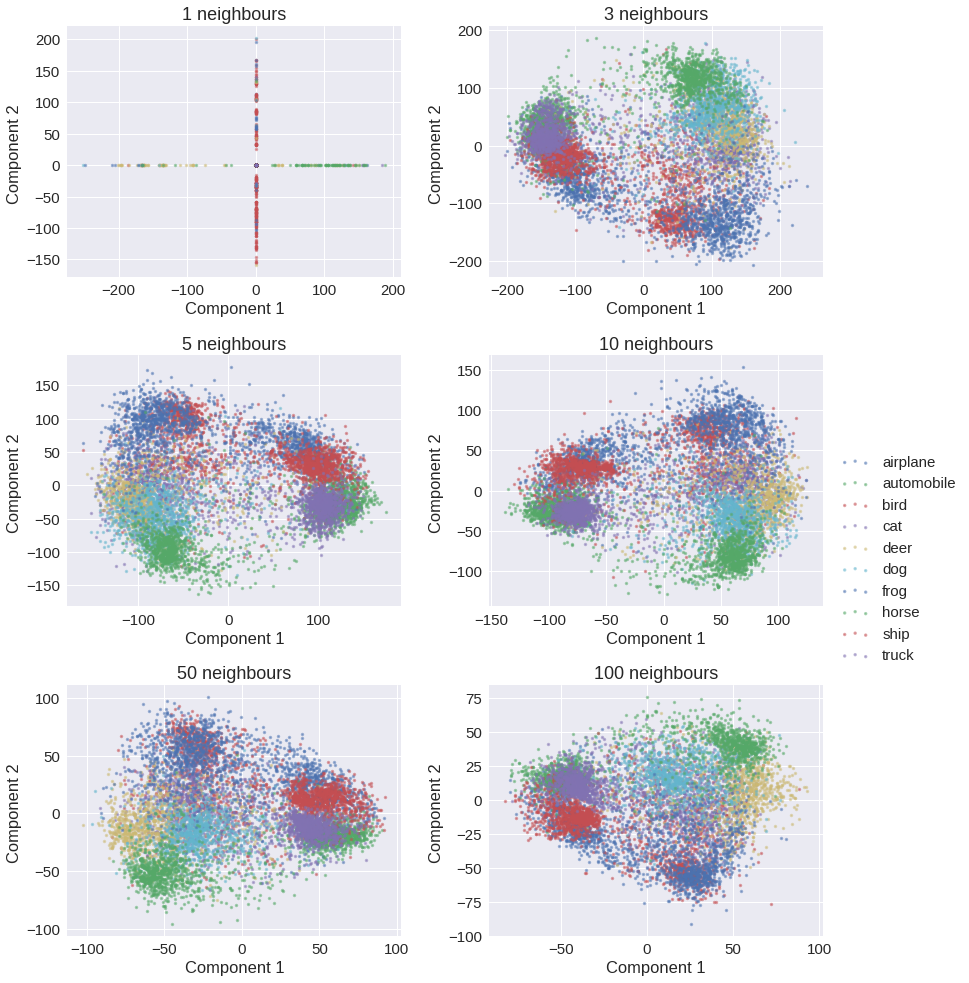

In [21]:
sns.set(font_scale=1.5) 
fig, ax = plt.subplots(3,2,figsize=(12,14))
for ii, n_neighbors in enumerate([1, 3, 5, 10, 50, 100]):
    ismp = Isomap(n_components=2, n_neighbors=n_neighbors)
    X_ismp_2d = ismp.fit_transform(X_sc_sml)
    plt.subplot(3,2,ii+1)
    scatter_2d_label(X_ismp_2d, y_sml,n_jobs=-1,labels=labels)
    plt.title('{} neighbours'.format(n_neighbors))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2 ')
plt.legend(loc='center left', bbox_to_anchor=[1.01, 1.5], scatterpoints=3)
fig.tight_layout()
plt.show()

100 neighbours looks like the best setting for isomap, but it seems TSNE is still better.

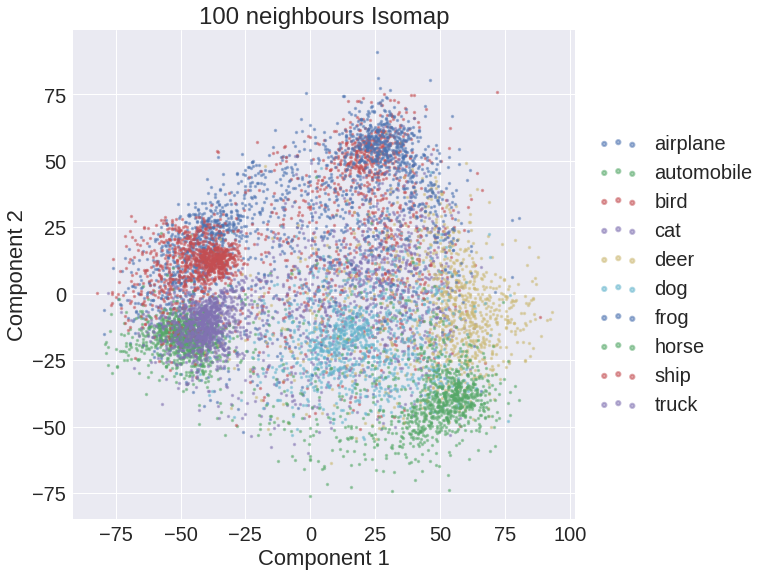

In [31]:
sns.set(font_scale=2.)
n_neighbors = 100
ismp = Isomap(n_components=2, n_neighbors=n_neighbors,n_jobs=-1)
X_ismp_2d = ismp.fit_transform(X_sc)
plt.figure(figsize=(9,9))
scatter_2d_label(X_ismp_2d, y_test,labels=labels)
plt.title('{} neighbours Isomap'.format(n_neighbors))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(loc='center left', bbox_to_anchor=[1.01, 0.5],markerscale=3, scatterpoints=3)
plt.show()

# Extras

### Metric MDS

We can try out different seetings for the metric MDS (Multidimensional Scalling) 

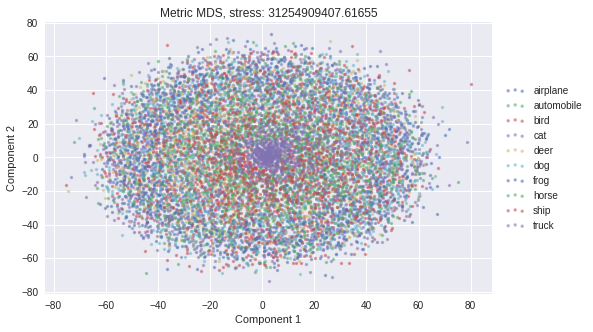

In [123]:
sns.set(font_scale=1.)
mds = MDS(n_components=2, metric=True, n_init=10, max_iter=100,n_jobs=-1, random_state=10)
X_mds_2d = mds.fit_transform(X_sc)
plt.figure(figsize=(8,5))
scatter_2d_label(X_mds_2d, y_test,labels=labels)
plt.title('Metric MDS, stress: {}'.format(mds.stress_))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(loc='center left', bbox_to_anchor=[1.01, 0.5], scatterpoints=3)
plt.show()

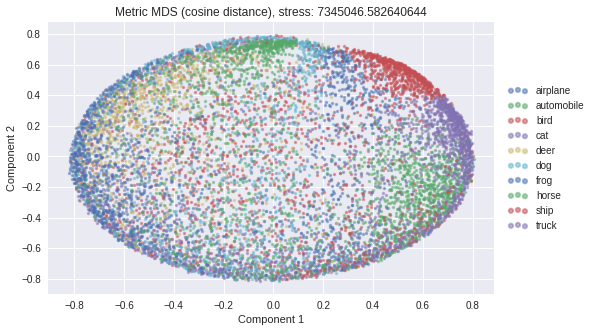

In [32]:
from sklearn.metrics.pairwise import pairwise_distances

similarities = pairwise_distances(X=X_sc, metric='cosine')
sns.set(font_scale=1.)
plt.figure(figsize=(8,5))
mds = MDS(n_components=2, metric=True, dissimilarity='precomputed',n_jobs=-1, n_init=2, max_iter=200)
X_mds_2d = mds.fit_transform(similarities)
scatter_2d_label(X_mds_2d, y_test,labels=labels)
plt.title('Metric MDS (cosine distance), stress: {}'.format(mds.stress_))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(loc='center left', bbox_to_anchor=[1.01, 0.5],markerscale=3, scatterpoints=3)
plt.show()


### KernelPCA

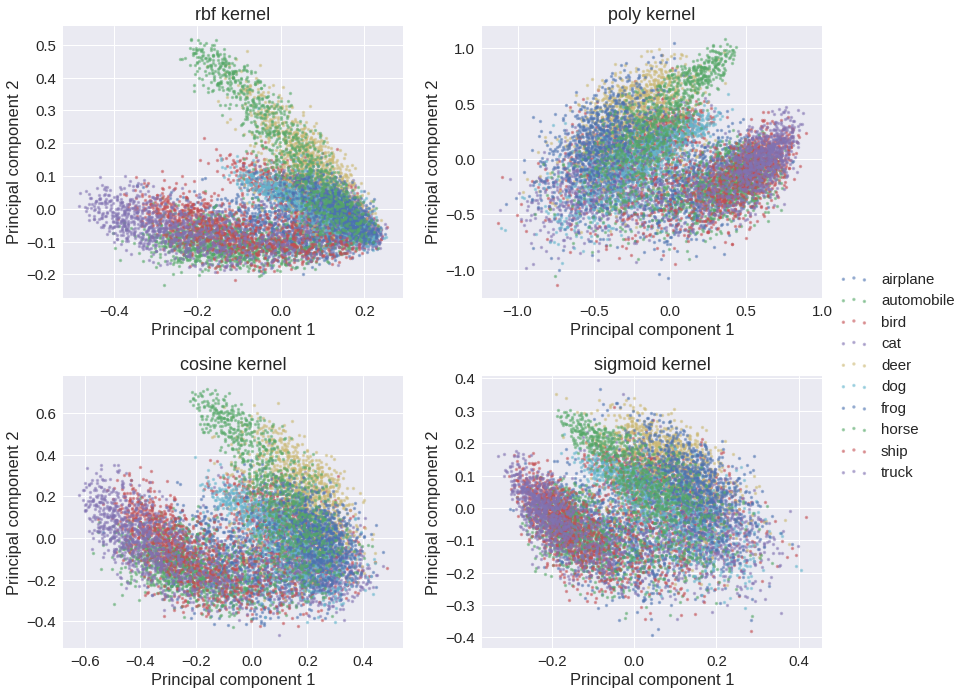

In [125]:

kernels = ['rbf', 'poly', 'cosine', 'sigmoid']

sns.set(font_scale=1.5)
fig, ax = plt.subplots(2,2,figsize=(12,10))
for ii, kernel in enumerate(kernels):
    X_kpca_2d = KernelPCA(n_components=2, kernel=kernel).fit_transform(X_sc)
    plt.subplot(2,2,ii+1)
    scatter_2d_label(X_kpca_2d, y_test,labels=labels)
    plt.title('{} kernel'.format(kernel))
    plt.xlabel('Principal component 1')
    plt.ylabel('Principal component 2')
plt.legend(loc='center left', bbox_to_anchor=[1.01, 1.],markerscale=3, scatterpoints=3)
fig.tight_layout()
plt.show()